<a href="https://colab.research.google.com/github/davidanagy/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
# It's not clear in the question, but Ryan clarified in Slack that I'm supposed to be finding the *sample* statistics.

def mean(numbers):
  return sum(numbers) / len(numbers)

def variance(numbers):
  distances = []
  for i in numbers:
    distances.append((i - mean(numbers))**2)
  return sum(distances) / ((len(numbers) - 1))

def stdev(numbers):
  return variance(numbers)**0.5

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print("The mean of last week's sales is", mean(sales))
print("The variance of last week's sales is", variance(sales))
print("The standard deviation of last week's sales is", stdev(sales))

The mean of last week's sales is 3052.714285714286
The variance of last week's sales is 214387.90476190473
The standard deviation of last week's sales is 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [169]:
customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame(np.array([sales, customers]).transpose(), columns=['sales', 'customers'])
                  
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [170]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [172]:
print("The covariance between last week's sales and last week's customers is", df.cov().iloc[0,1])

The covariance between last week's sales and last week's customers is 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [175]:
corr_coef = df.cov().iloc[0,1] / (stdev(sales) * stdev(customers))

print('The standard deviation of customers who entered the store last week is', stdev(customers))

print('The correlation coefficient of sales and customers is', corr_coef)

The standard deviation of customers who entered the store last week is 17.057326313123664
The correlation coefficient of sales and customers is 0.9628339778148909


In [176]:
df.corr() # Checked my work -- success!

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [68]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titanic = titanic.drop('Unnamed: 0', axis=1)

print(titanic.shape)

titanic.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [71]:
tit_num = titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'boat', 'body', 'has_cabin_number']]

tit_num.head()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,2,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,11,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,NaN,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,NaN,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,NaN,NaN,1


It's not clear whether the question is asking for the sample covariance or the population covariance. Since it's a pandas dataframe, I'll just go with the pandas default (sample covariance).

In [72]:
tit_num.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [73]:
tit_num.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

0.0


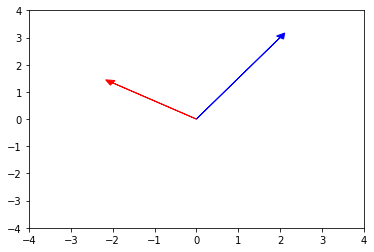

In [82]:
v_a = [2,3]
v_b = [-2, (4/3)]

print(np.dot(v_a, v_b))

plt.arrow(0,0, v_a[0],v_a[1], head_length=0.2, head_width=0.2, color='blue')
plt.arrow(0,0, v_b[0],v_b[1], head_length=0.2, head_width=0.2, color='red')
plt.xlim(-4,4)
plt.ylim(-4,4);

"Orthogonal" means "perpendicular."

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [83]:
def orth_test(a, b):
  if np.dot(a,b) == 0:
    return True
  else:
    return False

if orth_test([-5,3,7], [6,-8,2]) == True:
  print('The vectors are orthogonal, because their dot product is 0.')
else:
  print('The vectors are not orthogonal, because their dot product is not 0.')

The vectors are not orthogonal, because their dot product is not 0.


In [84]:
np.dot([-5,3,7], [6,-8,2]) # Just to confirm--my code worked.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [89]:
c = [2, -15, 6, 20]

print('||c||^2 =', sum([i**2 for i in c])) # Squaring the norm is equivalent to just never taking the square root in the first place.
print('c dot c =', np.dot(c, c))
print('c transpose times c =', np.dot(np.array(c).transpose(), c))

||c||^2 = 665
c dot c = 665
c transpose times c = 665


They're all the same!

It shouldn't be surprising that they're all the same. Squaring the norm just returns the sum of all the members of c squared, which is exactly what happens when you do c dot c.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

(I just copied and pasted the text from the lecture notebook and modified it appropriately.)

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [93]:
f = np.array([4, 12, 11, 9, 2])

f_norm = 1 / sum([i**2 for i in f])**0.5

f_norm * f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [95]:
# Confirm that it's a unit vector:

f_unit = f_norm * f

sum([i**2 for i in f_unit])**0.5 # I assume the float is due to a NumPy error. Success!

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

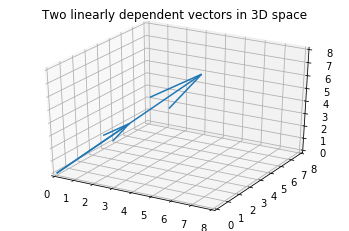

In [104]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

vectors = np.array([[0, 0, 0, 2, 3, 3], 
                    [0, 0, 0, 4, 6, 6]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0,8])
ax.set_ylim([0,8])
ax.set_zlim([0,8])
ax.set_title('Two linearly dependent vectors in 3D space');

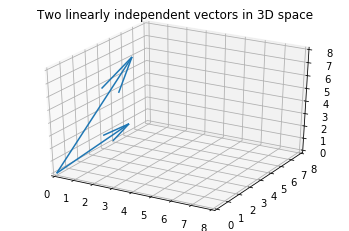

In [105]:
vectors = np.array([[0, 0, 0, 2, 3, 3], 
                    [0, 0, 0, 1, 5, 7]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0,8])
ax.set_ylim([0,8])
ax.set_zlim([0,8])
ax.set_title('Two linearly independent vectors in 3D space');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

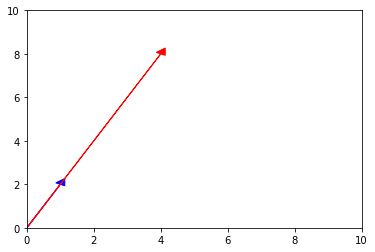

In [107]:
plt.arrow(0,0, 1,2, color='blue', head_length=0.3, head_width=0.3)
plt.arrow(0,0, 4,8, color='red', head_length=0.3, head_width=0.3)
plt.xlim(0,10)
plt.ylim(0,10);

The span of g and h is the line y = 2x

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

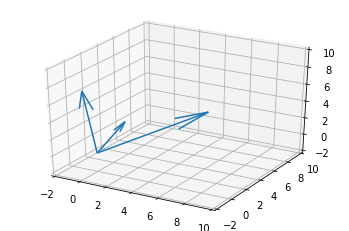

In [108]:
vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-2,10])
ax.set_ylim([-2,10])
ax.set_zlim([-2,10]);

The span of {l,m,n} is $\mathbb{R}^3$.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



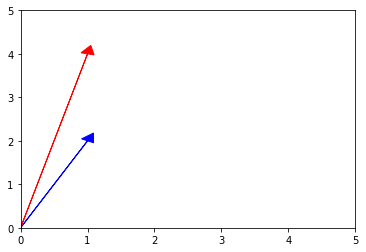

In [109]:
plt.arrow(0,0, 1,2, color='b', head_length=0.2, head_width=0.2)
plt.arrow(0,0, 1,4, color='r', head_length=0.2, head_width=0.2)
plt.xlim(0,5)
plt.ylim(0,5);

## 6.2 What does it mean to form a basis?

A set of vectors forms a basis if they are (a) linearly independent and (b) they span the vector space they inhabit. In other words, the set of vectors V forms a basis if any vector in their vector space can be formed by some linear combination of the vectors in V.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [111]:
P = np.array([[1,2,3], [-1,0,7], [4,8,2]])

P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [113]:
print('The rank of P is', np.linalg.matrix_rank(P))

The rank of P is 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimensional space spanned by that matrix. For example, since P has a rank of 3, that means the (row) vectors that make up P span over (form the basis for) $\mathbb{R}^3$.

For this reason, the rank of the matrix also tells us how many linearly dependent vectors in the matrix. If the matrix's rank is less than the number of vectors that comprises it, that means some of those vectors are linearly dependent.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [114]:
v = np.array([1,3])
w = np.array([-1,2])

projection_L_w = (np.dot(v,w) / np.dot(v,v)) * v

print('The projection of w onto L is', projection_L_w)

The projection of w onto L is [0.5 1.5]


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


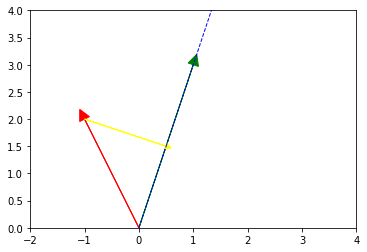

In [121]:
plt.xlim(-2, 4)
plt.ylim(0, 4)

axes = plt.gca()
plt.axes().set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 3 * x_vals

plt.arrow(0,0, 1,3, color='green', head_length=0.2, head_width=0.2)
plt.arrow(0,0, -1,2, color='red', head_length=0.2, head_width=0.2)
plt.arrow(-1,2, 1.5, -0.5, color='yellow', head_length=0.1, head_width=0.1)
plt.plot(x_vals, y_vals, '--', color='blue', linewidth=1);

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df

,x,y
0,1,4
1,4,2
2,7,5
3,3,0
4,9,8
5,4,2
6,5,8


In [0]:
def linproj_x_equals_y(x,y):
  v = np.array([1,1])
  w = np.array([x,y])
  return (np.dot(w,v) / np.dot(v,v)) * v

In [154]:
df.loc[0, 'x']

1

In [155]:
projections = []

for i in range(7):
  projections.append(linproj_x_equals_y(df.loc[i, 'x'], df.loc[i, 'y']))
  
projections

[array([2.5, 2.5]),
 array([3., 3.]),
 array([6., 6.]),
 array([1.5, 1.5]),
 array([8.5, 8.5]),
 array([3., 3.]),
 array([6.5, 6.5])]

In [156]:
df2 = pd.DataFrame(projections, columns=['x', 'y'])

df2

,x,y
0,2.5,2.5
1,3.0,3.0
2,6.0,6.0
3,1.5,1.5
4,8.5,8.5
5,3.0,3.0
6,6.5,6.5


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


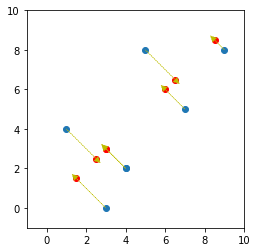

In [159]:
plt.scatter(df.x, df.y)
plt.scatter(df2['x'], df2['y'], color='r')

for i in range(7):
  plt.arrow(df.loc[i, 'x'], df.loc[i, 'y'], df2.loc[i, 'x']-df.loc[i, 'x'], df2.loc[i, 'y']-df.loc[i, 'y'], color='y', ls='--', lw=0.4, head_length=0.3, head_width=0.3)

axes = plt.gca()
plt.axes().set_aspect('equal')
  
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.show()